#Importando bibliotecas e base de dados

In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
data = pd.concat([X, y], axis=1)

#Limpando o dataset

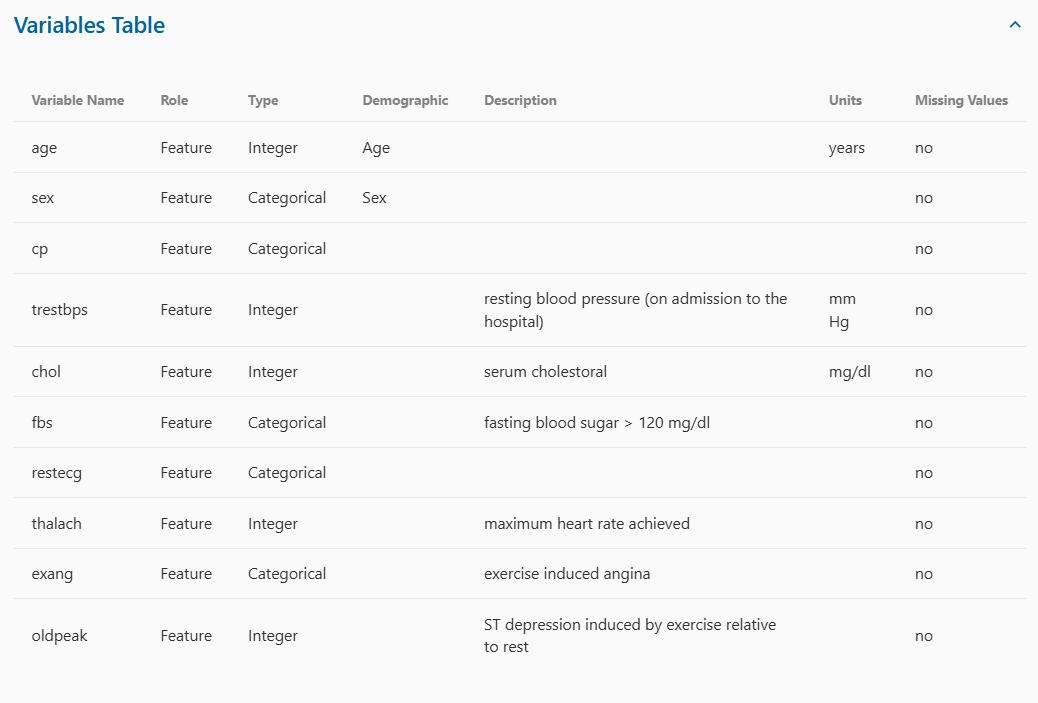

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [25]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Para garantir a integridade e a qualidade dos dados, optamos por uma técnica de imputação avançada para preencher os valores nulos nas colunas ca e thal, dada a pequena quantidade de valores ausentes e o número limitado de registros no dataset. Decidimos usar o K-Nearest Neighbors (KNN) Imputer.

In [26]:
imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['ca', 'thal']
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [27]:
data.isnull().sum().sum()

0

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data['num'].unique()

array([0, 2, 1, 3, 4])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Agora iremos dividir o dataset em dados de treino(80%) e teste(20%). Isso assegura que qualquer análise feita ou transformação aplicada seja baseada exclusivamente nos dados de treino, evitando qualquer tipo de viés ou vazamento de informações que poderiam comprometer a avaliação do modelo nos dados de teste.

In [31]:
X = data.drop('num', axis=1)
y = data['num']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

Dimensões do conjunto de treino: (242, 13) (242,)
Dimensões do conjunto de teste: (61, 13) (61,)


Os dados estão prontos para a Análise Exploratória dos Dados (EDA) após terem sido divididos em conjuntos de treino e teste. No entanto, futuras modificações, como normalização das variáveis numéricas, ainda serão necessárias no dataset para garantir o melhor desempenho ao rodar os algoritmos de classificação.

#Análise exploratória dos dados

In [32]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.805785,0.657025,3.090909,132.289256,245.619835,0.136364,0.991736,150.099174,0.338843,1.035537,1.595041,0.660331,4.686777
std,9.110177,0.475687,0.989572,18.208993,48.262982,0.343886,0.997889,22.470970,0.474297,1.187861,0.618907,0.899883,1.923406
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.500000,152.500000,0.000000,0.750000,2.000000,0.000000,3.000000
75%,61.750000,1.000000,4.000000,140.000000,272.500000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


A média de idade dos indivíduos é de 54 anos, com um desvio padrão de 9 anos, indicando uma predominância de adultos de meia-idade. A maioria dos participantes é do sexo masculino, com uma média de 0,7, o que sugere uma maior representação de homens no dataset. Além disso, a maioria dos indivíduos não apresenta angina induzida por exercício, com uma média de 0,33, indicando que essa condição é relativamente incomum na população analisada.

---
- Distribuição das features numéricas não categóricas

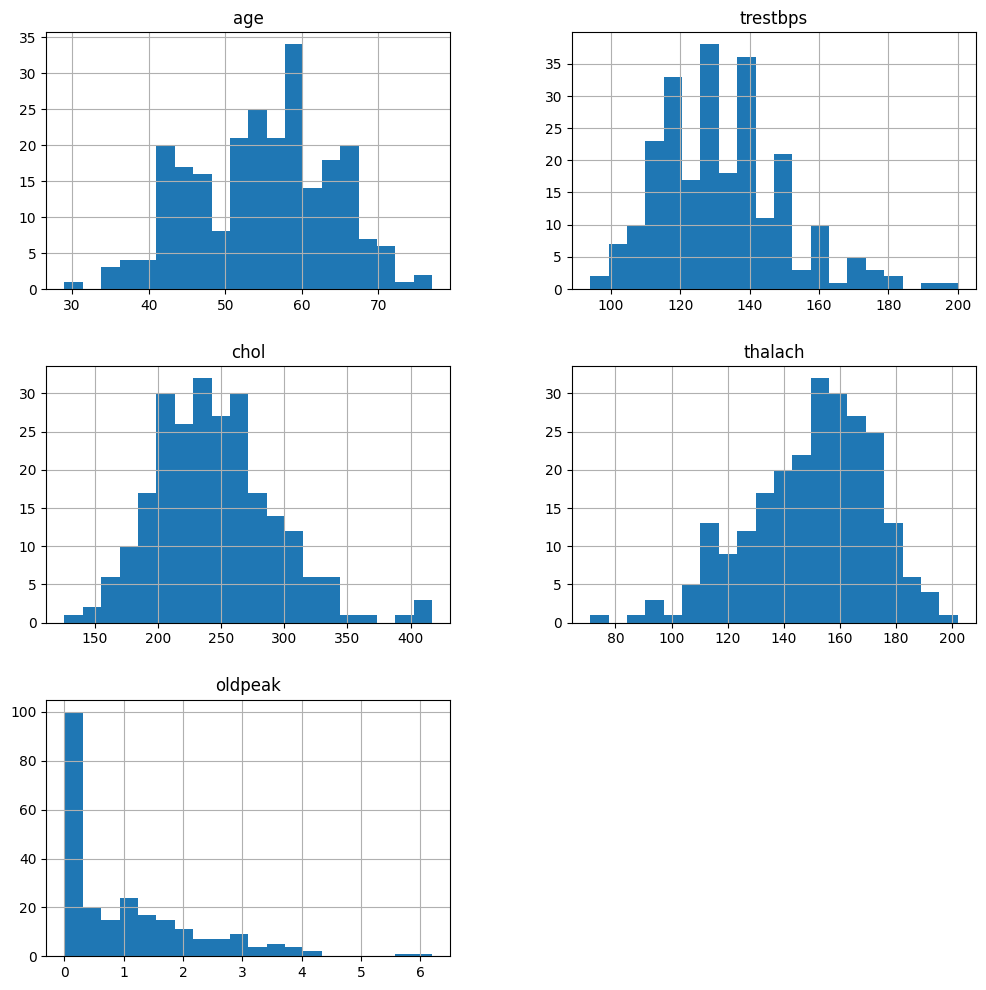

In [33]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[numerical_columns].hist(figsize=(12, 12), bins=20)
plt.show()

Esses histogramas reafirmam alguns insights que obtemos anteriormente, a maioria dos pacientes tem entre 50 e 60 anos, predominando adultos de meia-idade. A pressão arterial em repouso está geralmente entre 120 e 140 mmHg, e os níveis de colesterol situam-se entre 200 e 300 mg/dL, sugerindo que muitos pacientes podem estar no limite ou acima do desejável. A frequência cardíaca máxima está concentrada entre 140 e 160 bpm, e a maioria dos pacientes não apresenta uma depressão significativa do segmento ST.

---
- Distribuição da variável alvo

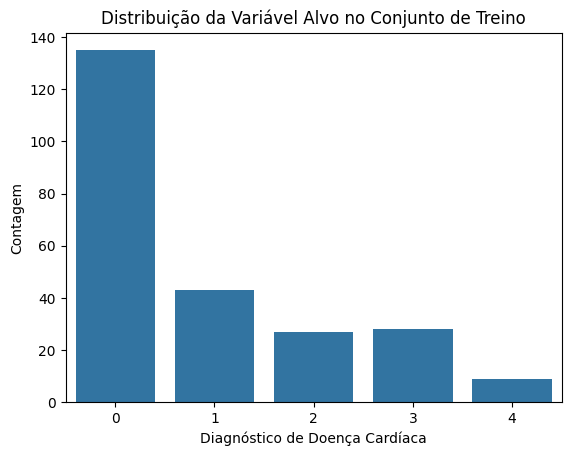

In [34]:
sns.countplot(x=y_train)
plt.title('Distribuição da Variável Alvo no Conjunto de Treino')
plt.xlabel('Diagnóstico de Doença Cardíaca')
plt.ylabel('Contagem')
plt.show()

A distribuição da variável alvo revelou que a classe 0, que indica ausência de doença cardíaca, é a mais frequente entre os pacientes do conjunto de treino, sugerindo que uma proporção significativa dos pacientes não apresenta doença cardíaca. As outras classes (1, 2, 3 e 4) têm uma frequência menor, com a classe 4 sendo a menos representada, indicando um desequilíbrio significativo entre as classes. Este desequilíbrio pode impactar a performance do modelo preditivo, destacando a necessidade de aplicar técnicas de balanceamento, como oversampling das classes minoritárias ou undersampling da classe majoritária, para garantir que o modelo não seja tendencioso.

---
- Gráficos de barras das features categóricas

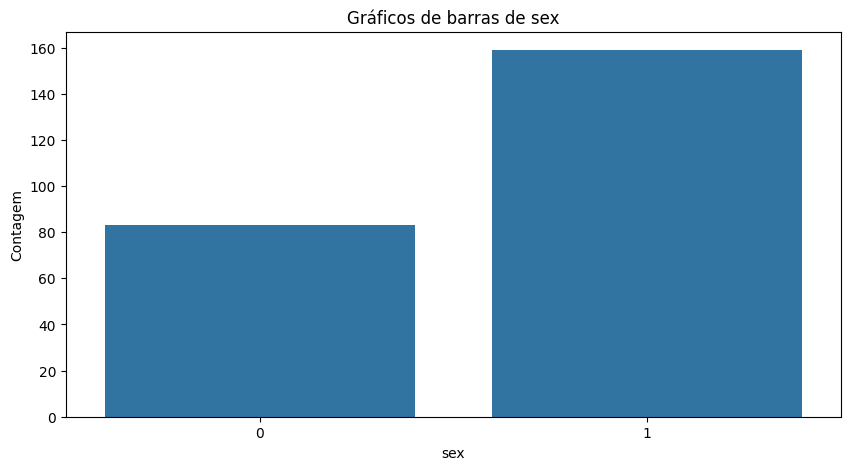

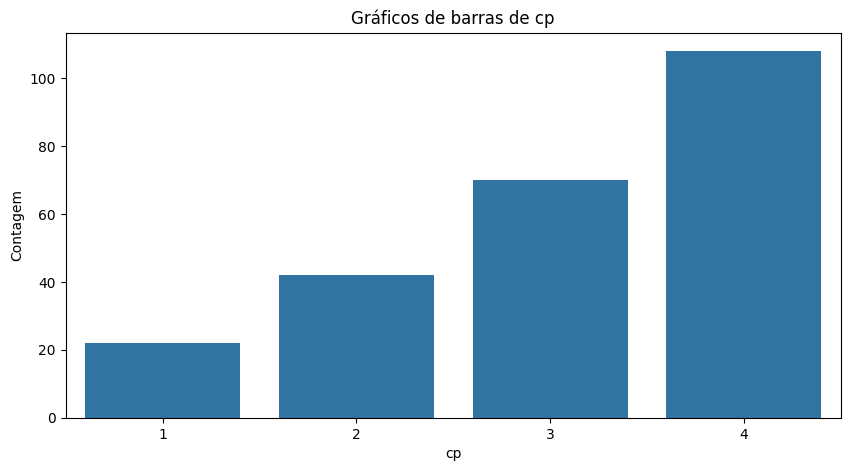

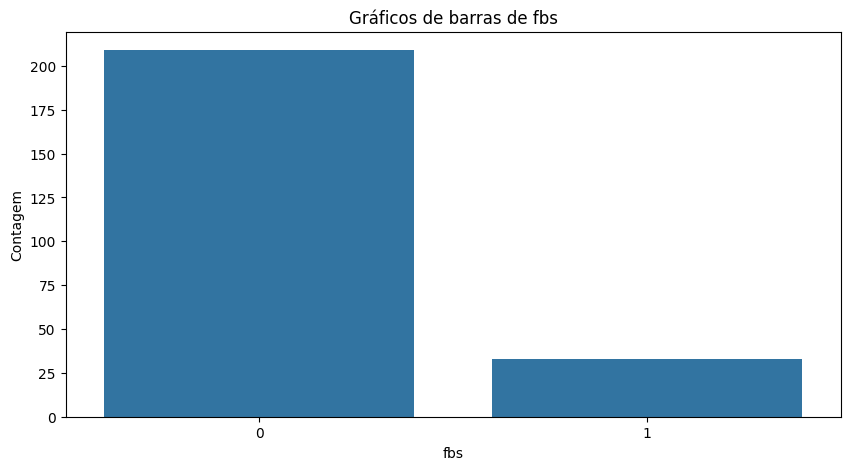

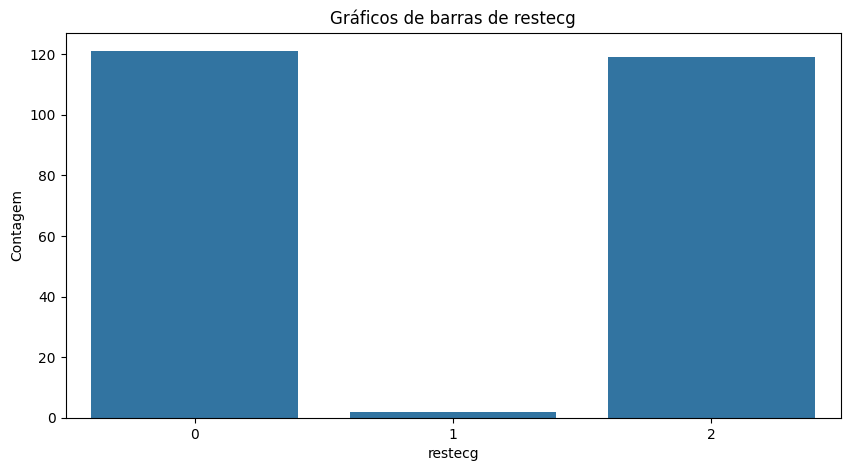

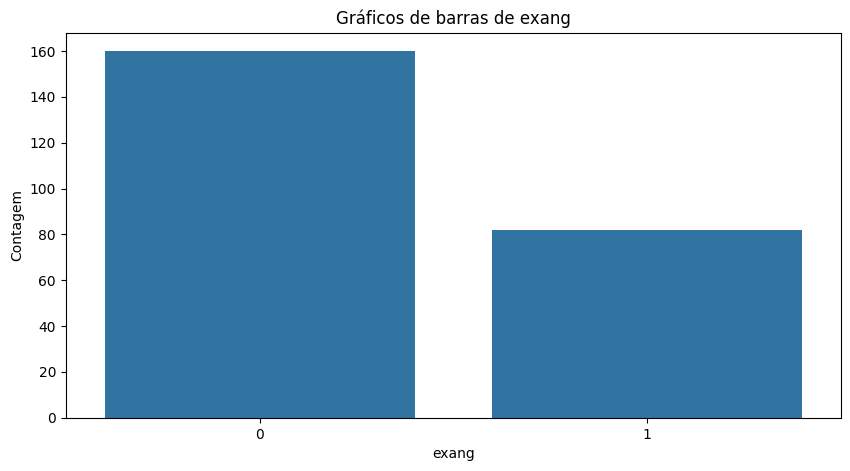

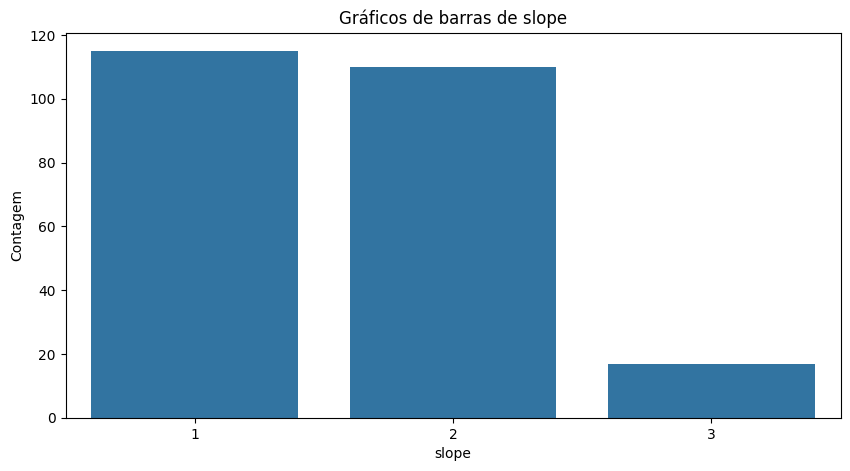

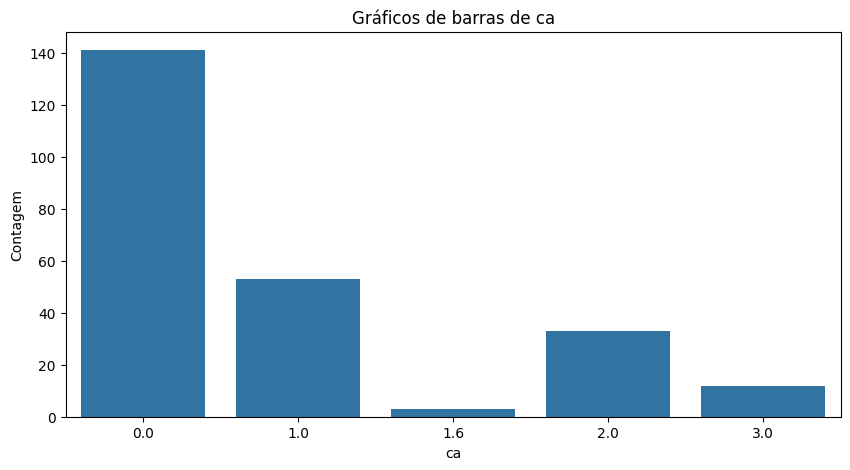

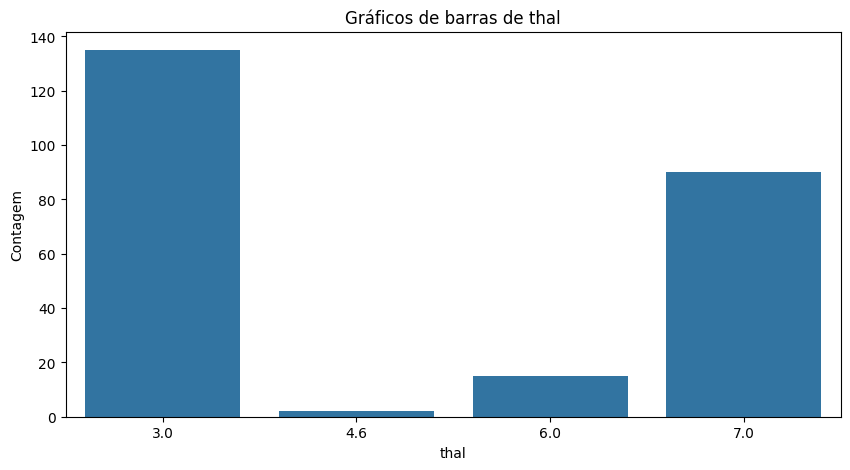

In [35]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=X_train[column])
    plt.title(f'Gráficos de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()


A maioria dos pacientes é do sexo masculino e são assintomático à dor no peito, além de níveis normais de açúcar no sangue em jejum e não apresentam angina induzida por exercício. Os resultados do eletrocardiograma estão divididos em normais e Hipertrofia ventricular esquerda provável ou definitiva. Em relação à inclinação do segmento ST, as categorias mais frequentes são 1:Ascendente e 2:Plano. A maioria dos pacientes tem 0 vasos principais coloridos, indicando pouca ou nenhuma obstrução grave, e a maioria dos indivíduos analisados não possui anomalias significativas relacionadas à talassemia em seus exames ou possuem defeito reversível.

---
- Boxplot das variáveis numéricas

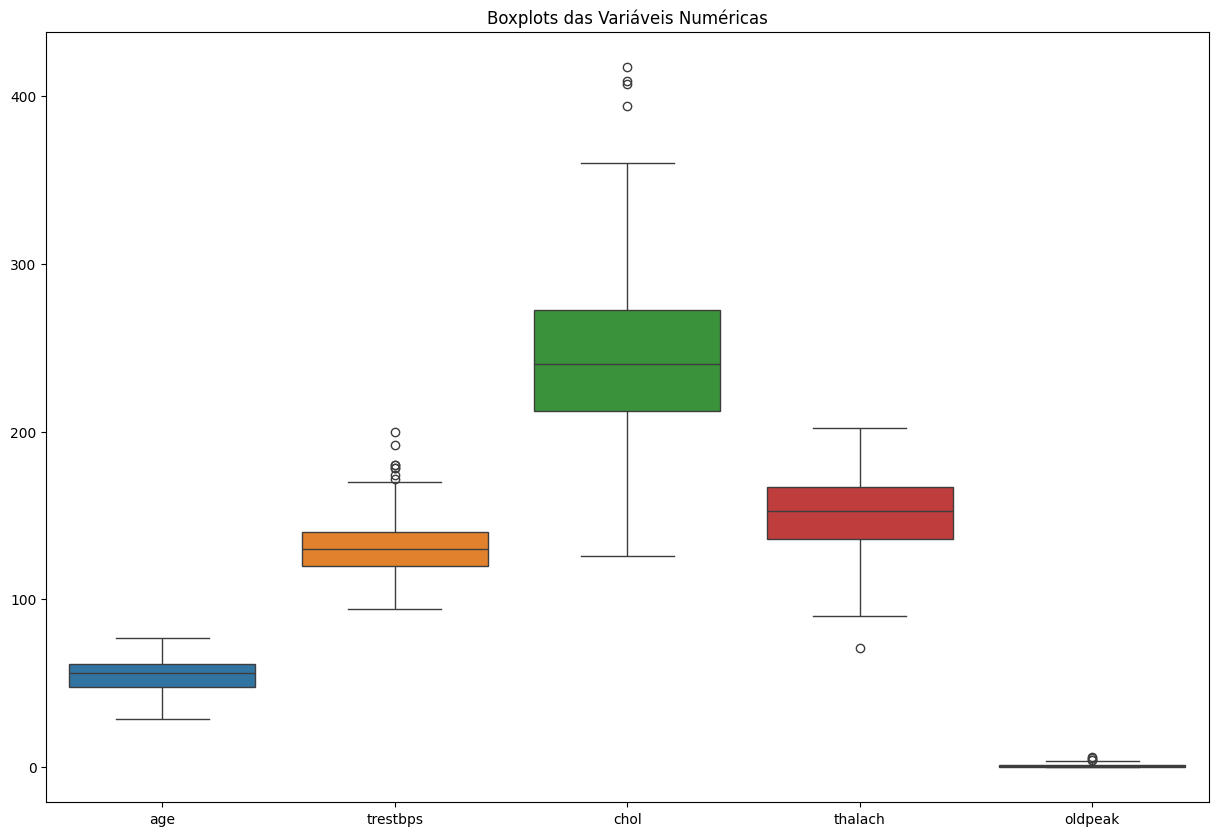

In [36]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train[numerical_columns])
plt.title('Boxplots das Variáveis Numéricas')
plt.show()

Os boxplots das variáveis numéricas revelou a presença de outliers notáveis, particularmente nas variáveis chol (colesterol) e trestbps (pressão arterial em repouso). A mediana de chol está em torno de 240 mg/dL, com diversos outliers, e a mediana de trestbps está em torno de 130 mmHg, com alguns outliers. Considerando que temos um dataset de pequeno volume, remover esses outliers poderia reduzir ainda mais a quantidade de dados disponíveis, comprometendo a performance do modelo preditivo. Portanto, a aplicação de transformações logarítmicas será nossa estratégia eficaz para minimizar o impacto desses outliers, reduzindo a variância e normalizando a distribuição dos dados.

In [37]:
X_train['chol_log'] = np.log1p(X_train['chol'])
X_train['trestbps_log'] = np.log1p(X_train['trestbps'])

X_test['chol_log'] = np.log1p(X_test['chol'])
X_test['trestbps_log'] = np.log1p(X_test['trestbps'])

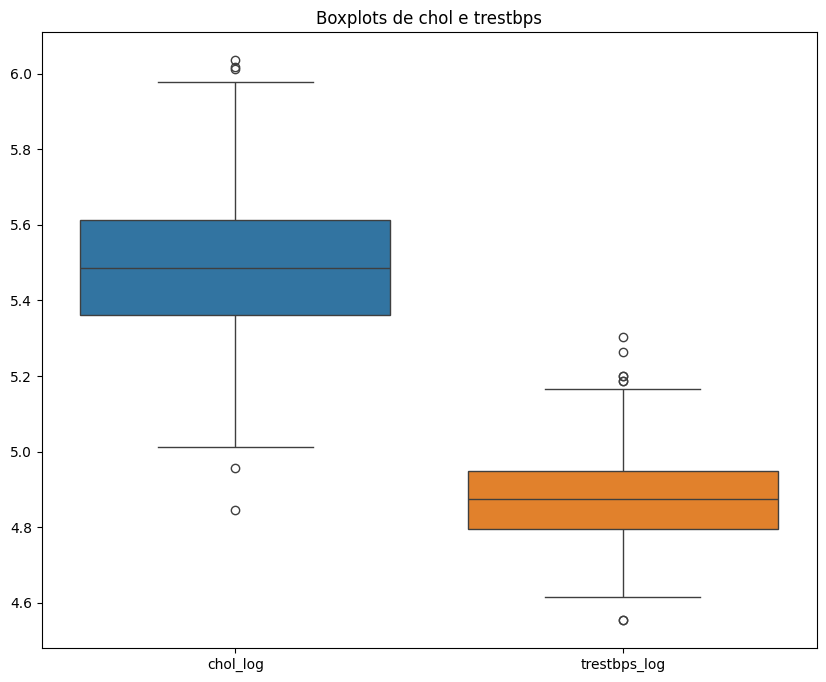

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train[['chol_log', 'trestbps_log']])
plt.title('Boxplots de chol e trestbps')
plt.show()

A princípio, manteremos esses poucos outliers que restaram após a transformação logarítmica. Esses outliers não impactam significativamente a análise e o desempenho do modelo, e podem fornecer informações valiosas sobre variações extremas e casos raros. Monitoraremos o impacto desses outliers nos resultados finais do modelo e ajustaremos conforme necessário.

---
- Correlação entre as variáveis

Para medir a correlação entre variáveis numéricas e categóricas no dataset de doenças cardíacas, optamos pela correlação de Spearman. Essa escolha se deve ao fato de que a correlação de Spearman avalia associações monotônicas e é menos sensível a outliers, proporcionando uma análise mais robusta e precisa. Em contraste, a correlação de Pearson mede apenas relações lineares e pode ser distorcida por outliers.

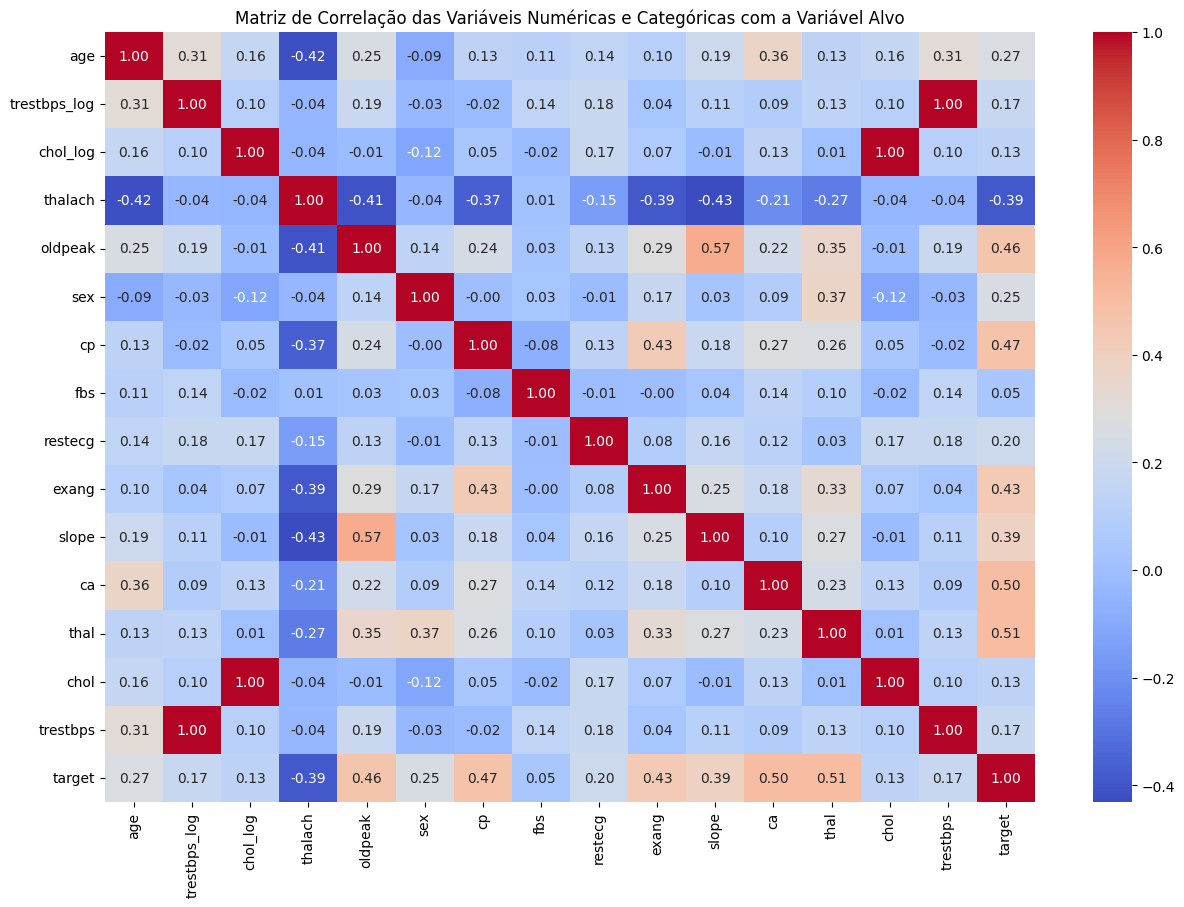

In [39]:
X_train['target'] = y_train
all_columns = ['age', 'trestbps_log', 'chol_log', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'chol', 'trestbps', 'target']

correlation_matrix = X_train[all_columns].corr(method='spearman')

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas e Categóricas com a Variável Alvo')
plt.show()


Na matriz de correlação das variáveis do dataset, identificamos que thal, ca, slope, exang, cp e oldpeak têm correlações moderadas com a variável alvo (target). Esses insights destacam a importância dessas variáveis na predição do desfecho e nos ajudam na seleção de features mais relevantes.

Além disso, foi identificado que slope e oldpeak possuem uma correlação moderada de 0.57 e slope e oldpeak 0.43. Dado que essas correlações não são excessivamente altas, a princípio, decidimos manter ambas as variáveis no modelo. Esta decisão permitirá que o modelo capture a informação contida em cada uma delas sem introduzir redundância significativa.



In [40]:
data.to_csv('preprocessed_data.csv', index=False)